In [14]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import statistics

In [15]:
tipsdata=sns.load_dataset('tips')
tipsdata

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [16]:
#Mean
np.mean(tipsdata['total_bill'])

19.78594262295082

In [17]:
#Meadian
np.median(tipsdata['total_bill'])

17.795

In [18]:
#Mode
statistics.mode(tipsdata['total_bill'])

13.42

<Axes: >

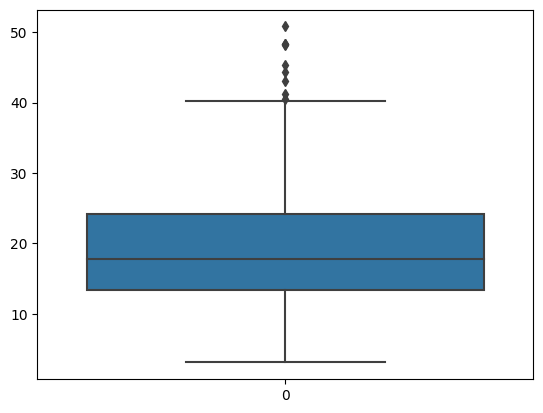

In [20]:
sns.boxplot(tipsdata['total_bill'])

<Axes: xlabel='total_bill', ylabel='Count'>

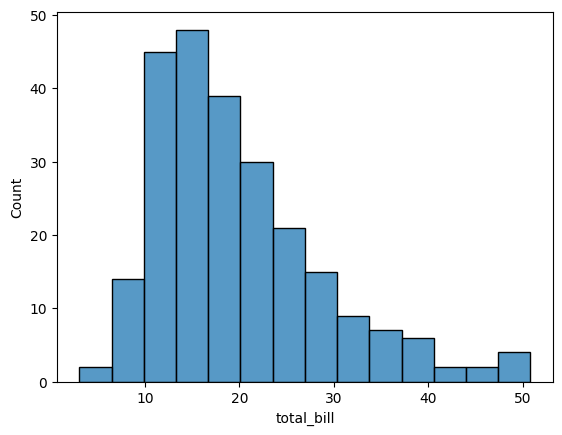

In [21]:
sns.histplot(tipsdata['total_bill'])

<Axes: xlabel='total_bill', ylabel='Count'>

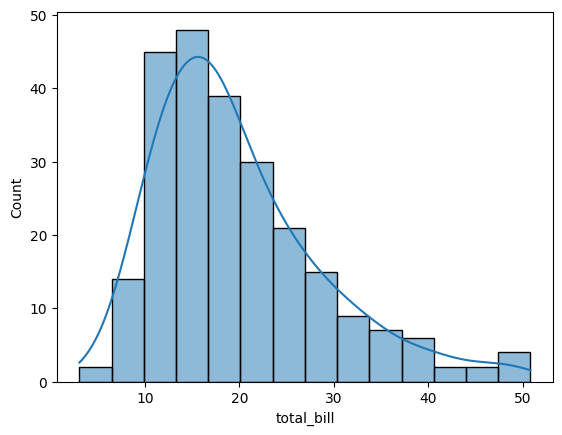

In [30]:
sns.histplot(tipsdata['total_bill'],kde=True)
# Note :
# kde = kernel density functions
# this is log normal distribution

In [37]:
np.percentile(tipsdata["total_bill"],[25,75])

array([13.3475, 24.1275])

In [38]:
df=sns.load_dataset('iris')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [40]:
#Outliers
dataset=[11,10,12,14,12,15,14,102,12,14,17,19,107,10,13,12,14,12,108,12,11,14,13,15,10,15,12,10,14,13,15,10]

<Axes: ylabel='Count'>

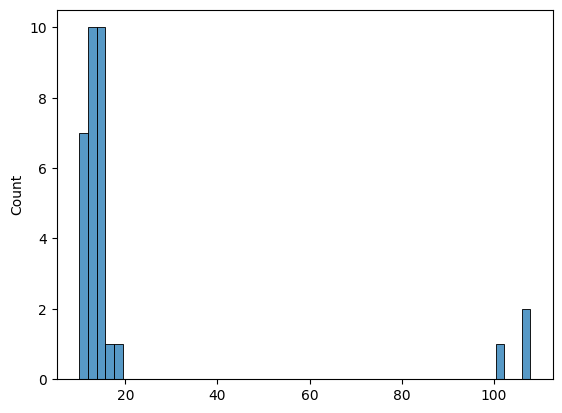

In [43]:
sns.histplot(dataset)

In [44]:
#how do i calculate outliers
### 1) zscore
### 2) IQR

In [47]:
### 1) zscore
outliers=[]
def detect_outliers(data):
    threshold = 3 ## 3 standard deviation
    mean = np.mean(data)
    std=np.std(data)
    
    for i in data:
        z_score=(i-mean)/std
        if np.abs(z_score)>threshold:
            outliers.append(i)
    return outliers

In [48]:
detect_outliers(dataset)

[107, 108]

In [49]:
### 2) IQR
#### 1) sort the data
#### 2) calculate Q1 and Q3
#### 3) IQR(Q1-Q3)
#### 4) Find the Lower Fence(q1-1.5(iqr))
#### 5) Find the Upper Fence(q3+1.5(iqr))

In [59]:
dataset.sort()
dataset[:-5:-1]

[108, 107, 102, 19]

In [60]:
q1,q3=np.percentile(dataset,[25,75])
print(q1,q3)

12.0 15.0


In [61]:
iqr=q3-q1
print(iqr)

3.0


In [63]:
lower_fence=q1-(1.5*iqr)
higher_fence=q3+(1.5*iqr)

In [64]:
print(lower_fence,higher_fence)

7.5 19.5
